<a href="https://colab.research.google.com/github/DA24B020/Project-SMAC/blob/main/Ayush/Tasks/Problems_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task_0 (Script):**

Write a script that takes two arguments - the first being either “$\pi$” or “$e$” and the second being an integer between 1 and 200. If the first argument is $x$ and second argument is $n$ then your script is expected to display the $n$th digit of $x$ after the decimal point. The script should display a message if $n$ is outside the range and exit elegantly. If the number of arguments is less than 2, then too the script should display an appropriate message and exit properly.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving task1.sh to task1.sh


**Task_1 (Connecting Problem):**

In a square box of size 100x100, place 20 points randomly. Connect each point to the nearest three and thus discretize the square into elements. Display the points and their connections using a plot. Save the locations of the points in a text file (smac_upskilling1_random_points.txt) in the increasing order of their distance from the origin.

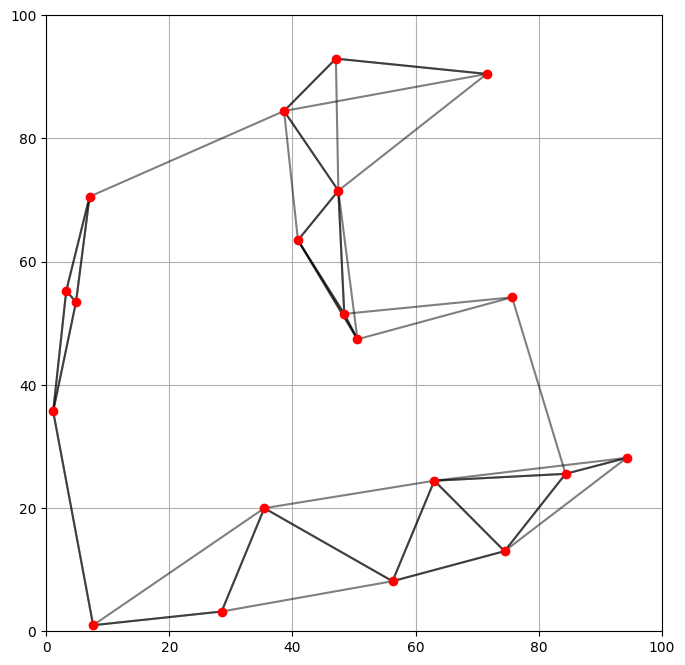

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import random
import math

points = np.random.rand(20,2)*100
dist = distance_matrix(points, points)

connections = []
for i in range(len(points)):
    nearest = np.argsort(dist[i])[1:4]

    for j in nearest:
        connections.append((i, j))

plt.figure(figsize=(8, 8))
for i, j in connections:
    plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'k-', alpha=0.5)

plt.scatter(points[:, 0], points[:, 1], color='red', zorder=5)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal')
plt.savefig("smac_upskilling1_plot.png")
plt.show()

origin_dist = np.linalg.norm(points, axis=1)
sorted_indices = np.argsort(origin_dist)
sorted_points = points[sorted_indices]
with open("smac_upskilling1_random_points.txt", "w") as f:
    for p in sorted_points:
        f.write(f"{p[0]:.4f} {p[1]:.4f}\n")

**Task_2 (Use of Gerschgorin-Circle):**

Consider a function a follows:

$f=x^5-13x^3-x^2+10x+170$

How many real roots does this function have? Estimate all the roots. Visualize the roots using
Gerschgorin-Circle. Include a plot of the function itself, complete with labels and title in your
report.

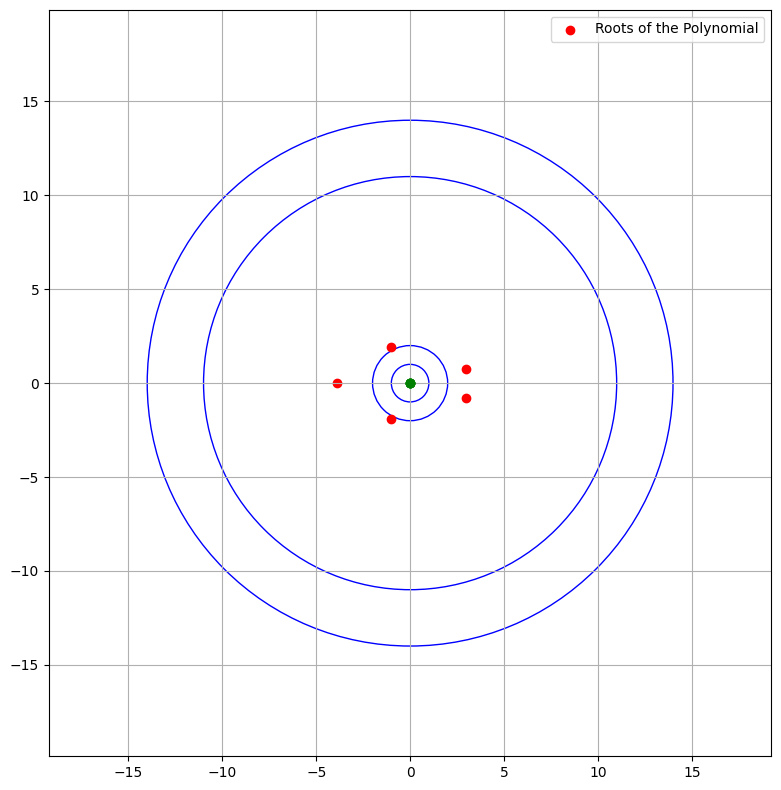

In [7]:
import numpy as np
import matplotlib.pyplot as plt

coeffs = [1, 0, -13, -1, 10, 170]
p = np.poly1d(coeffs)
roots = np.roots(coeffs)
real_roots = roots[np.isreal(roots)].real

#companion matrix
n = len(coeffs) - 1
companion_matrix = np.zeros((n, n))
companion_matrix[1:, :-1] = np.eye(n - 1)
a_rest = coeffs[1:][::-1]
companion_matrix[:, -1] = -np.array(a_rest) / coeffs[0]
g_c = [(companion_matrix[i, i], sum(abs(companion_matrix[i, j]) for j in range(n) if j != i)) for i in range(n)]

fig, ax = plt.subplots(figsize=(8, 8))
for a,b in g_c:
    circle = plt.Circle((a.real, 0), b, color='blue', fill=False, linestyle='-')
    ax.add_artist(circle)
    ax.plot(a.real, 0, 'go')

plt.scatter(roots.real, roots.imag, color='red', label='Roots of the Polynomial')
plt.grid(True)
plt.axis('equal')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
plt.legend()
plt.tight_layout()
plt.show()



**Task_3 (Natural Cubic Spline Fuction vs Polynomial Interpolation):**

Plot the natural cubic spline function that interpolates the following set of data points.
Compare this graph with the one obtained from a polynomial interpolation for the same set of
points. Your report should include the functions that were used to make the plots.

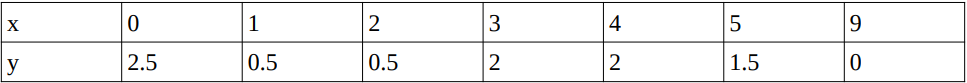

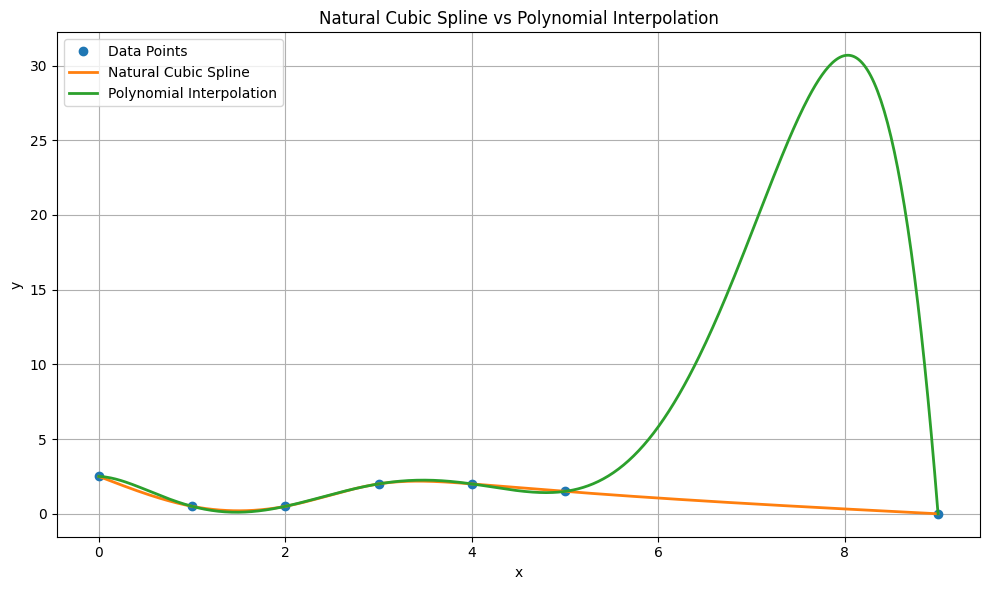

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial

xs = np.array([0, 1, 2, 3, 4, 5, 9])
ys = np.array([2.5, 0.5, 0.5, 2, 2, 1.5, 0])

sp = CubicSpline(xs, ys, bc_type='natural')
poly_c = np.polyfit(xs, ys, len(xs) - 1)
poly_f = np.poly1d(poly_c)
x = np.linspace(min(xs), max(xs), 500)
y = sp(x)
y_poly = poly_f(x)

plt.figure(figsize=(10, 6))
plt.plot(xs, ys, 'o', label='Data Points')
plt.plot(x, y, label='Natural Cubic Spline', linewidth=2)
plt.plot(x, y_poly, label='Polynomial Interpolation', linestyle='-', linewidth=2)
plt.title('Natural Cubic Spline vs Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()